In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('flavors_of_cacao.csv')
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [4]:
df.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [5]:
df.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [6]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [7]:
df['Bean\nType'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Matina                        3
Beniano                       3
Nacional (Arriba)             3
Nacional                      2
Criollo (Ocumare 61)          2
Amazon mix                    2
Trinitario, Forastero         2
Amazon, ICS                   2
Forastero (Catongo)           2
Trinitario (85% Criollo)      2
Criollo, Forastero            2
Criollo (Amarru)              2
Criollo (Ocumare)             1
Trinitario, TCGA              1
CCN51                         1
Criollo (Ocumare 77)          1
Amazon                        1
Forastero(Arriba, CCN)        1
Blend-Fo

In [8]:
df['Bean\nType'].nunique()

41

<AxesSubplot:>

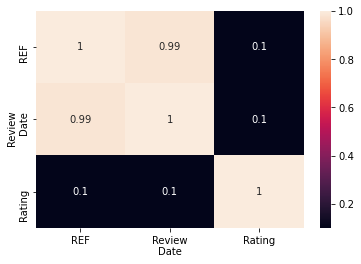

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
print('Unique Values:')
print('Company (Maker-if known): ',df['Company\xa0\n(Maker-if known)'].nunique())
print('Specific Bean Origin or Bar Name: ', df['Specific Bean Origin\nor Bar Name'].nunique())
print('Company Location: ',df['Company\nLocation'].nunique())
print('Bean Type: ', df['Bean\nType'].nunique())
print('Broad Bean Origin', df['Broad Bean\nOrigin'].nunique())
print('Review Date: ', df['Review\nDate'].nunique())
print('Cocoa Percent: ', df['Cocoa\nPercent'].nunique())

Unique Values:
Company (Maker-if known):  416
Specific Bean Origin or Bar Name:  1039
Company Location:  60
Bean Type:  41
Broad Bean Origin 100
Review Date:  12
Cocoa Percent:  45


<AxesSubplot:xlabel='Rating', ylabel='count'>

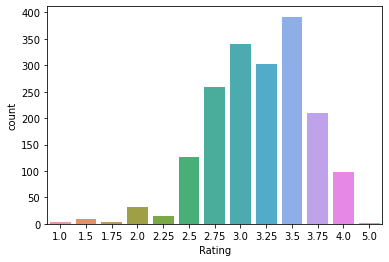

In [11]:
sns.countplot(x = df['Rating'])

<AxesSubplot:xlabel='Review\nDate', ylabel='count'>

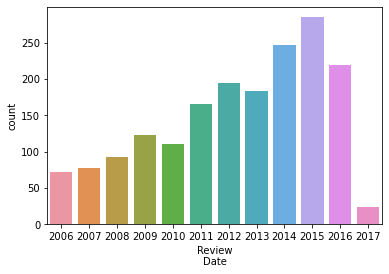

In [12]:
sns.countplot(x = df['Review\nDate'])

In [13]:
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.replace('%', '')
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.replace('.', '')
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].astype(int)

<AxesSubplot:xlabel='Cocoa\nPercent', ylabel='count'>

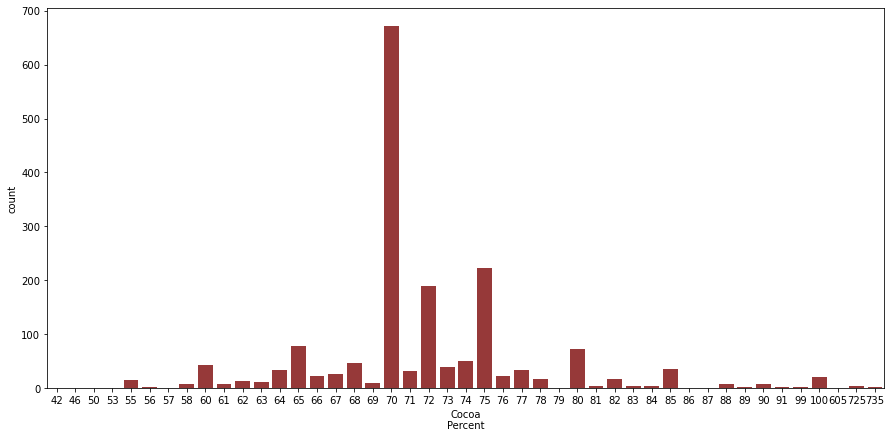

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x= 'Cocoa\nPercent', data = df, color = 'brown')

In [15]:
def normalizeIt(percent):
    if percent > 100:
        percent = int(str(percent)[:2])
    return percent

In [16]:
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].apply(normalizeIt)

<AxesSubplot:xlabel='Cocoa\nPercent', ylabel='count'>

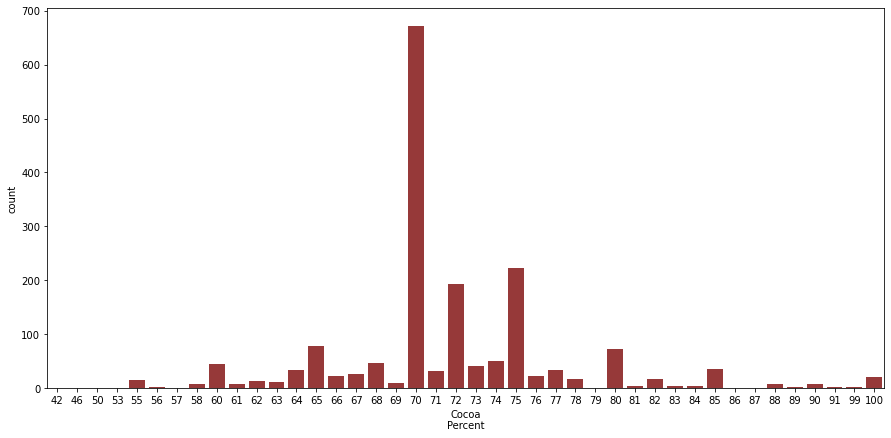

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(x= 'Cocoa\nPercent', data = df, color = 'brown')

In [18]:
df['Rating'] = (df['Rating']* 100).astype(int)
df['Rating'].head(5)

0    375
1    275
2    300
3    350
4    350
Name: Rating, dtype: int32

In [19]:
company = pd.get_dummies(df['Company\xa0\n(Maker-if known)'],drop_first=True)
sbOrigin = pd.get_dummies(df['Specific Bean Origin\nor Bar Name'],drop_first=True)
companyLocation = pd.get_dummies(df['Company\nLocation'],drop_first=True)
bType = pd.get_dummies(df['Bean\nType'],drop_first=True)
bbOrigin = pd.get_dummies(df['Broad Bean\nOrigin'],drop_first=True)

In [20]:
df = pd.concat([df, company, sbOrigin, companyLocation, bType, bbOrigin], axis = 1)

In [21]:
df.drop(['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name','Company\nLocation', 'Bean\nType', 
         'Broad Bean\nOrigin'], axis = 1, inplace = True )

In [22]:
#Removing Duplicate Column

df = df.loc[:,~df.columns.duplicated()]


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('Rating', axis = 1) #Features
y = df['Rating']   # Target Variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [27]:
df['Venezuela'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Venezuela, dtype: uint8

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         100       0.00      0.00      0.00         2
         150       0.00      0.00      0.00         3
         175       0.00      0.00      0.00         1
         200       0.20      0.14      0.17         7
         225       0.00      0.00      0.00         1
         250       0.21      0.07      0.11        41
         275       0.21      0.21      0.21        68
         300       0.27      0.34      0.30        99
         325       0.29      0.32      0.31       100
         350       0.33      0.43      0.38       129
         375       0.12      0.08      0.10        61
         400       0.11      0.04      0.06        27

    accuracy                           0.27       539
   macro avg       0.15      0.14      0.14       539
weighted avg       0.25      0.27      0.25       539



f:\python-3.6\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print(accuracy_score(y_test,rfc_pred)*100)

27.087198515769945


<AxesSubplot:xlabel='Rating', ylabel='count'>

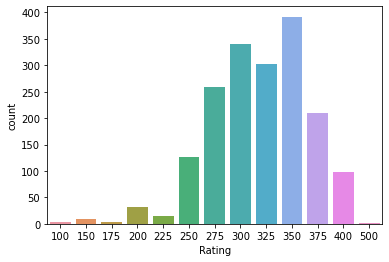

In [31]:
sns.countplot(x = 'Rating', data=df)

In [32]:
def rating_to_stars(rating):
    
    rating = int(rating)
    
    if (rating == 0.0 ):
        return 0.0
    elif (rating > 0 ) and (rating <= 199 ):
        return 1.0
    elif (rating >= 200 ) and (rating <= 299 ):
        return 2.0
    elif (rating >= 300 ) and (rating <= 399 ):
        return 3.0
    else:
        return 4.0

In [33]:
df['Rating'] = df['Rating'].apply(rating_to_stars)

<AxesSubplot:xlabel='Rating', ylabel='count'>

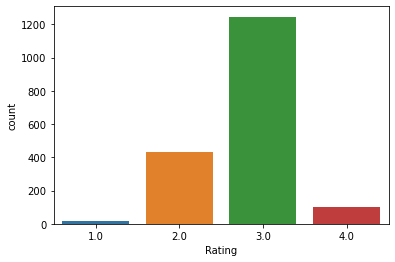

In [34]:
sns.countplot(x = 'Rating', data=df)

In [35]:
X = df.drop('Rating', axis = 1)
y = df['Rating']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [37]:
rfc = RandomForestClassifier(n_estimators=5000, min_weight_fraction_leaf= 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0, n_estimators=5000)

In [38]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.63      0.16      0.26       117
         3.0       0.75      0.97      0.84       389
         4.0       0.33      0.04      0.07        27

    accuracy                           0.74       539
   macro avg       0.43      0.29      0.29       539
weighted avg       0.69      0.74      0.67       539



f:\python-3.6\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(accuracy_score(y_test,rfc_pred)*100)

73.8404452690167
